<a href="https://colab.research.google.com/github/wndnjs2037/2022_BigDataProgramming/blob/main/project/2020_%EB%B2%94%EC%A3%84%EC%9E%90_%EB%B2%94%ED%96%89%EC%8B%9C_%EC%A0%95%EC%8B%A0%EC%83%81%ED%83%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 범죄별 정신상태가 어떤지 그래프로 시각화
# 행복지수가 정신상태에 미치는 영향을 분석할 수 있을지?
# 파이그래프로 여성과 남성의 정신이상상태 시각화 확인

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

plt.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = [8,5]

In [10]:
df = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')

df.head(5)

,division,남자(계),남자(정상),남자(정신이상),남자(정신박약),남자(기타정신장애),남자(주취),남자(미상),여자(계),여자(정상),여자(정신이상),여자(정신박약),여자(기타정신장애),여자(주취),여자(월경시이상),미상
0,살인 범죄,632,263,21,3,14,212,119,163,74,4,1,7,22,0,55
1,"강간, 강제추행 범죄",23989,10347,89,110,177,7537,5729,991,404,6,4,18,176,0,383
2,강도 범죄,1026,777,9,1,20,110,109,176,124,1,1,5,7,0,38
3,절도 범죄,72665,57862,282,315,763,6098,7345,25760,20924,220,91,594,993,70,2868
4,폭력 범죄,258549,93439,715,168,1056,77424,85747,55441,23556,375,58,505,10548,7,20392


In [14]:
df1 = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')
df1 = df1.set_index('division')
df1

,남자(계),남자(정상),남자(정신이상),남자(정신박약),남자(기타정신장애),남자(주취),남자(미상),여자(계),여자(정상),여자(정신이상),여자(정신박약),여자(기타정신장애),여자(주취),여자(월경시이상),미상
division,,,,,,,,,,,,,,,
살인 범죄,632,263,21,3,14,212,119,163,74,4,1,7,22,0,55
"강간, 강제추행 범죄",23989,10347,89,110,177,7537,5729,991,404,6,4,18,176,0,383
강도 범죄,1026,777,9,1,20,110,109,176,124,1,1,5,7,0,38
절도 범죄,72665,57862,282,315,763,6098,7345,25760,20924,220,91,594,993,70,2868
폭력 범죄,258549,93439,715,168,1056,77424,85747,55441,23556,375,58,505,10548,7,20392


In [33]:
murder_male = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')
murder_male = murder_male.drop(index=[1,2,3,4], axis=0)
murder_male = murder_male.drop(columns=['남자(계)', '여자(계)','여자(정상)','여자(정신이상)', '여자(정신박약)','여자(기타정신장애)','여자(주취)','여자(월경시이상)','미상'], axis=0)
murder_male = murder_male.set_index('division')
murder_male = murder_male.transpose()
murder_male = murder_male.sort_values('살인 범죄')
murder_male

division,살인 범죄
남자(정신박약),3
남자(기타정신장애),14
남자(정신이상),21
남자(미상),119
남자(주취),212
남자(정상),263


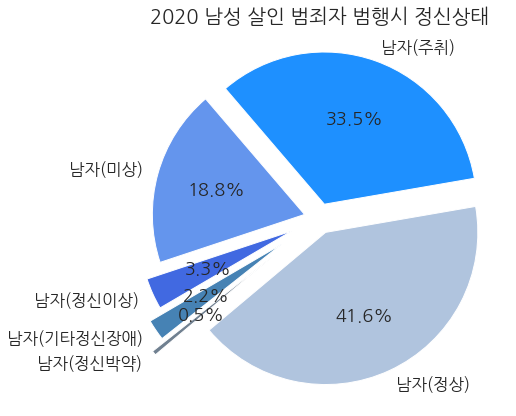

In [103]:
fig = plt.figure(figsize=(7,7))
explode = [0.4, 0.3, 0.2, 0.1,0.1,0.1]
colors = ['slategrey', 'steelblue', 'royalblue','cornflowerblue', 'dodgerblue', 'lightsteelblue']
labels=['남자(정신박약)', '남자(기타정신장애)', '남자(정신이상)', '남자(미상)','남자(주취)', '남자(정상)']
plt.pie(murder_male['살인 범죄'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2020 남성 살인 범죄자 범행시 정신상태", fontsize=20)
#plt.figure(figsize=(5,5))
#plt.legend(loc=(1.3,0), fontsize=15)
plt.show()

In [101]:
murder_female = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')
murder_female = murder_female.drop(index=[1,2,3,4], axis=0)
murder_female = murder_female.drop(columns=['남자(계)', '여자(계)','남자(정상)','남자(정신이상)', '남자(정신박약)','남자(기타정신장애)','남자(주취)','남자(미상)'], axis=0)
murder_female = murder_female.set_index('division')
murder_female = murder_female.transpose()
murder_female = murder_female.sort_values('살인 범죄')
murder_female

division,살인 범죄
여자(월경시이상),0
여자(정신박약),1
여자(정신이상),4
여자(기타정신장애),7
여자(주취),22
미상,55
여자(정상),74


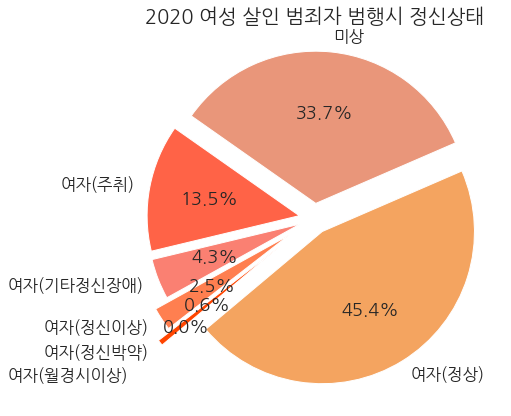

In [105]:
fig = plt.figure(figsize=(7,7))
explode = [0.5, 0.3, 0.2, 0.1,0.1,0.1, 0.1]
colors = ['slategrey', 'orangered', 'coral','salmon', 'tomato', 'darksalmon', 'sandybrown']
labels=['여자(월경시이상)','여자(정신박약)','여자(정신이상)','여자(기타정신장애)','여자(주취)','미상','여자(정상)']
plt.pie(murder_female['살인 범죄'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2020 여성 살인 범죄자 범행시 정신상태", fontsize=20)
#plt.figure(figsize=(5,5))
#plt.legend(loc=(1.3,0), fontsize=15)
plt.show()

In [106]:
rape_male = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')
rape_male = rape_male.drop(index=[0,2,3,4], axis=0)
rape_male = rape_male.drop(columns=['남자(계)', '여자(계)','여자(정상)','여자(정신이상)', '여자(정신박약)','여자(기타정신장애)','여자(주취)','여자(월경시이상)','미상'], axis=0)
rape_male = rape_male.set_index('division')
rape_male = rape_male.transpose()
rape_male = rape_male.sort_values('강간, 강제추행 범죄')
rape_male

division,"강간, 강제추행 범죄"
남자(정신이상),89
남자(정신박약),110
남자(기타정신장애),177
남자(미상),5729
남자(주취),7537
남자(정상),10347


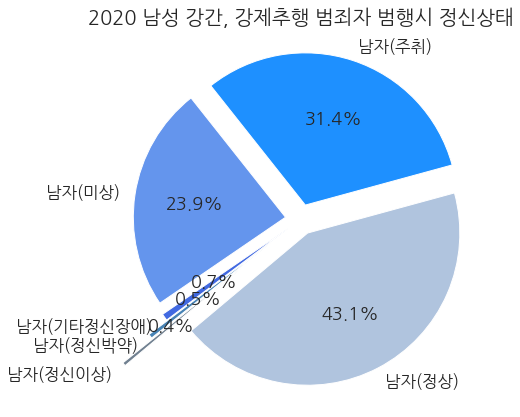

In [107]:
fig = plt.figure(figsize=(7,7))
explode = [0.5, 0.25, 0.1, 0.1,0.1,0.1]
colors = ['slategrey', 'steelblue', 'royalblue','cornflowerblue', 'dodgerblue', 'lightsteelblue']
labels=['남자(정신이상)', '남자(정신박약)', '남자(기타정신장애)', '남자(미상)', '남자(주취)', '남자(정상)']
plt.pie(rape_male['강간, 강제추행 범죄'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2020 남성 강간, 강제추행 범죄자 범행시 정신상태", fontsize=20)
plt.show()

In [116]:
rape_female = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')
rape_female = rape_female.drop(index=[0,2,3,4], axis=0)
rape_female = rape_female.drop(columns=['남자(계)', '여자(계)','남자(정상)','남자(정신이상)', '남자(정신박약)','남자(기타정신장애)','남자(주취)','남자(미상)'], axis=0)
rape_female = rape_female.set_index('division')
rape_female = rape_female.transpose()
rape_female = rape_female.sort_values('강간, 강제추행 범죄')
rape_female

division,"강간, 강제추행 범죄"
여자(월경시이상),0
여자(정신박약),4
여자(정신이상),6
여자(기타정신장애),18
여자(주취),176
미상,383
여자(정상),404


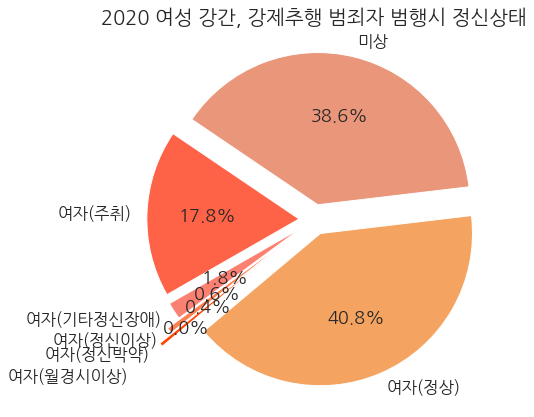

In [117]:
fig = plt.figure(figsize=(7,7))
explode = [0.5, 0.3, 0.2, 0.1,0.1,0.1, 0.1]
colors = ['slategrey', 'orangered', 'coral','salmon', 'tomato', 'darksalmon', 'sandybrown']
labels=['여자(월경시이상)','여자(정신박약)','여자(정신이상)','여자(기타정신장애)','여자(주취)','미상','여자(정상)']
plt.pie(rape_female['강간, 강제추행 범죄'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2020 여성 강간, 강제추행 범죄자 범행시 정신상태", fontsize=20)
plt.show()

In [126]:
heist_male = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')
heist_male = heist_male.drop(index=[0,1,3,4], axis=0)
heist_male = heist_male.drop(columns=['남자(계)', '여자(계)','여자(정상)','여자(정신이상)', '여자(정신박약)','여자(기타정신장애)','여자(주취)','여자(월경시이상)','미상'], axis=0)
heist_male = heist_male.set_index('division')
heist_male = heist_male.transpose()
heist_male = heist_male.sort_values('강도 범죄')
heist_male

division,강도 범죄
남자(정신박약),1
남자(정신이상),9
남자(기타정신장애),20
남자(미상),109
남자(주취),110
남자(정상),777


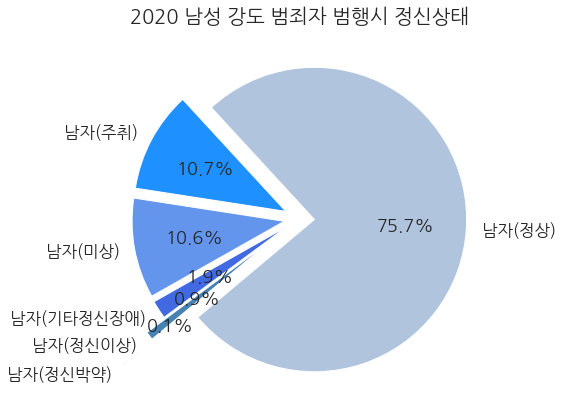

In [127]:
fig = plt.figure(figsize=(7,7))
explode = [0.5, 0.25, 0.1, 0.1,0.1,0.1]
colors = ['slategrey', 'steelblue', 'royalblue','cornflowerblue', 'dodgerblue', 'lightsteelblue']
labels=['남자(정신박약)','남자(정신이상)','남자(기타정신장애)','남자(미상)','남자(주취)','남자(정상)']
plt.pie(heist_male['강도 범죄'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2020 남성 강도 범죄자 범행시 정신상태", fontsize=20)
plt.show()

In [128]:
heist_female = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')
heist_female = heist_female.drop(index=[0,1,3,4], axis=0)
heist_female = heist_female.drop(columns=['남자(계)', '여자(계)','남자(정상)','남자(정신이상)', '남자(정신박약)','남자(기타정신장애)','남자(주취)','남자(미상)'], axis=0)
heist_female = heist_female.set_index('division')
heist_female = heist_female.transpose()
heist_female = heist_female.sort_values('강도 범죄')
heist_female

division,강도 범죄
여자(월경시이상),0
여자(정신이상),1
여자(정신박약),1
여자(기타정신장애),5
여자(주취),7
미상,38
여자(정상),124


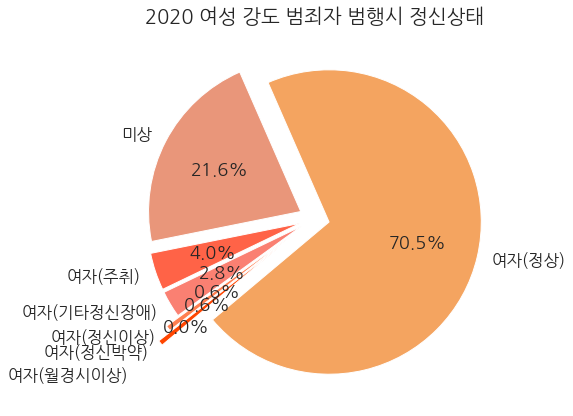

In [129]:
fig = plt.figure(figsize=(7,7))
explode = [0.5, 0.3, 0.2, 0.1,0.1,0.1, 0.1]
colors = ['slategrey', 'orangered', 'coral','salmon', 'tomato', 'darksalmon', 'sandybrown']
labels=['여자(월경시이상)','여자(정신박약)','여자(정신이상)','여자(기타정신장애)','여자(주취)','미상','여자(정상)']
plt.pie(heist_female['강도 범죄'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2020 여성 강도 범죄자 범행시 정신상태", fontsize=20)
plt.show()

In [111]:
burglary_male = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')
burglary_male = burglary_male.drop(index=[0,1,2,4], axis=0)
burglary_male = burglary_male.drop(columns=['남자(계)', '여자(계)','여자(정상)','여자(정신이상)', '여자(정신박약)','여자(기타정신장애)','여자(주취)','여자(월경시이상)','미상'], axis=0)
burglary_male = burglary_male.set_index('division')
burglary_male = burglary_male.transpose()
burglary_male = burglary_male.sort_values('절도 범죄')
burglary_male

division,절도 범죄
남자(정신이상),282
남자(정신박약),315
남자(기타정신장애),763
남자(주취),6098
남자(미상),7345
남자(정상),57862


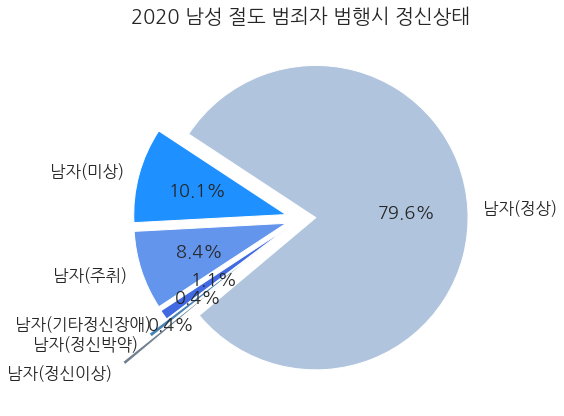

In [113]:
fig = plt.figure(figsize=(7,7))
explode = [0.5, 0.25, 0.1, 0.1,0.1,0.1]
colors = ['slategrey', 'steelblue', 'royalblue','cornflowerblue', 'dodgerblue', 'lightsteelblue']
labels=['남자(정신이상)', '남자(정신박약)','남자(기타정신장애)','남자(주취)','남자(미상)','남자(정상)']
plt.pie(burglary_male['절도 범죄'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2020 남성 절도 범죄자 범행시 정신상태", fontsize=20)
plt.show()

In [130]:
burglary_female = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')
burglary_female = burglary_female.drop(index=[0,1,2,4], axis=0)
burglary_female = burglary_female.drop(columns=['남자(계)', '여자(계)','남자(정상)','남자(정신이상)', '남자(정신박약)','남자(기타정신장애)','남자(주취)','남자(미상)'], axis=0)
burglary_female = burglary_female.set_index('division')
burglary_female = burglary_female.transpose()
burglary_female = burglary_female.sort_values('절도 범죄')
burglary_female

division,절도 범죄
여자(월경시이상),70
여자(정신박약),91
여자(정신이상),220
여자(기타정신장애),594
여자(주취),993
미상,2868
여자(정상),20924


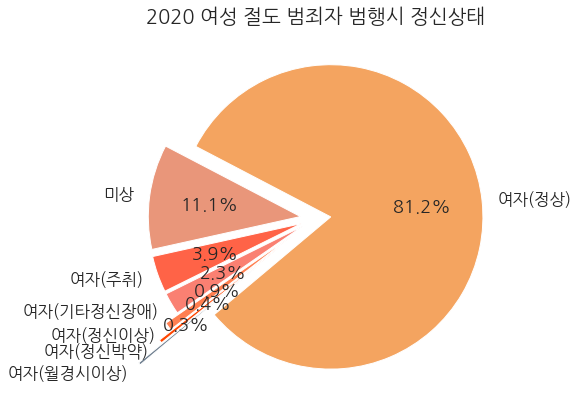

In [131]:
fig = plt.figure(figsize=(7,7))
explode = [0.5, 0.3, 0.2, 0.1,0.1,0.1, 0.1]
colors = ['slategrey', 'orangered', 'coral','salmon', 'tomato', 'darksalmon', 'sandybrown']
labels=['여자(월경시이상)','여자(정신박약)','여자(정신이상)','여자(기타정신장애)','여자(주취)','미상','여자(정상)']
plt.pie(burglary_female['절도 범죄'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2020 여성 절도 범죄자 범행시 정신상태", fontsize=20)
plt.show()

In [114]:
violence_male = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')
violence_male = violence_male.drop(index=[0,1,2,3], axis=0)
violence_male = violence_male.drop(columns=['남자(계)', '여자(계)','여자(정상)','여자(정신이상)', '여자(정신박약)','여자(기타정신장애)','여자(주취)','여자(월경시이상)','미상'], axis=0)
violence_male = violence_male.set_index('division')
violence_male = violence_male.transpose()
violence_male = violence_male.sort_values('폭력 범죄')
violence_male


division,폭력 범죄
남자(정신박약),168
남자(정신이상),715
남자(기타정신장애),1056
남자(주취),77424
남자(미상),85747
남자(정상),93439


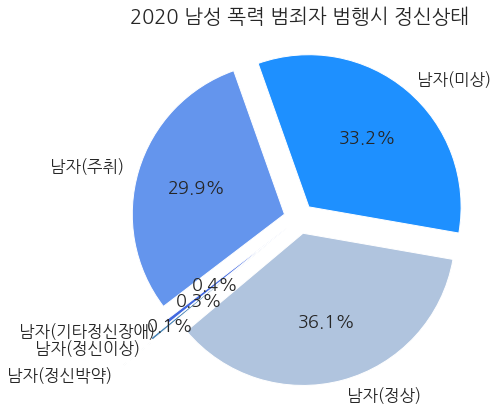

In [115]:
fig = plt.figure(figsize=(7,7))
explode = [0.5, 0.25, 0.1, 0.1,0.1,0.1]
colors = ['slategrey', 'steelblue', 'royalblue','cornflowerblue', 'dodgerblue', 'lightsteelblue']
labels=['남자(정신박약)','남자(정신이상)','남자(기타정신장애)','남자(주취)','남자(미상)','남자(정상)' ]
plt.pie(violence_male['폭력 범죄'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2020 남성 폭력 범죄자 범행시 정신상태", fontsize=20)
plt.show()

In [133]:
violence_female = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2020 범죄자 범행시 정신상태(처리).csv', encoding='cp949')
violence_female = violence_female.drop(index=[0,1,2,3], axis=0)
violence_female = violence_female.drop(columns=['남자(계)', '여자(계)','남자(정상)','남자(정신이상)', '남자(정신박약)','남자(기타정신장애)','남자(주취)','남자(미상)'], axis=0)
violence_female = violence_female.set_index('division')
violence_female = violence_female.transpose()
violence_female = violence_female.sort_values('폭력 범죄')
violence_female

division,폭력 범죄
여자(월경시이상),7
여자(정신박약),58
여자(정신이상),375
여자(기타정신장애),505
여자(주취),10548
미상,20392
여자(정상),23556


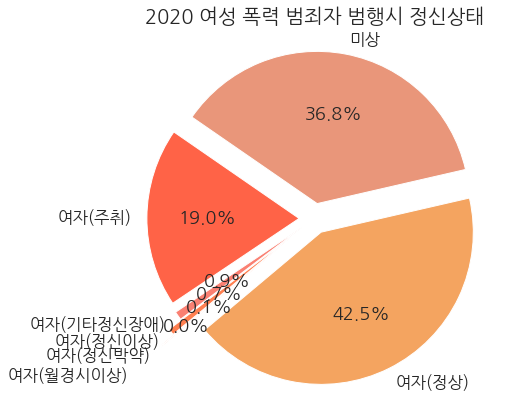

In [135]:
fig = plt.figure(figsize=(7,7))
explode = [0.5, 0.3, 0.2, 0.1,0.1,0.1, 0.1]
colors = ['slategrey', 'orangered', 'coral','salmon', 'tomato', 'darksalmon', 'sandybrown']
labels=['여자(월경시이상)','여자(정신박약)','여자(정신이상)','여자(기타정신장애)','여자(주취)','미상','여자(정상)']
plt.pie(burglary_female['폭력 범죄'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2020 여성 폭력 범죄자 범행시 정신상태", fontsize=20)
plt.show()